### CIS9 Final Project: Better Sleep Habit

In [16]:
#Marie Shimizu

Using unsupervised model, clustering to analyze the characteristics of people who have a “good” sleep quality. The dataset that I would like to use is from SleepFoundation.org 2013 data of adult sleep habits. </br>
- Data Source: https://www.sleepfoundation.org/professionals/sleep-americar-polls/2013-exercise-and-sleep
- Using unsupervised, clustter model to analyse the characteristics of people who have "good" sleep quality


In [17]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans

1. Read data from 2013SleepData.xls into a DataFrame, print the size of the DataFrame and the first few lines of data.

In [18]:
# Read raw data from 2013SleepData.xls
raw = pd.read_excel('2013SleepData.xls')

# Print the size and show first 5 lines of data
print(raw.shape)

raw.head()

(1000, 256)


,caseid,source,market,region,smptype,city,state,zip,fips,dma,...,NSFDISABLE,WEIGHT,HEIGHT,BMI,STOPBAG1,STOPBAG2,IPAQ36,IPAQ38,IPAQ40,IPAQTOTAL
0,1,CATI,west_l1,4,L,CORTEZ,CO,81321,08083,790,...,1,1.000000,73.0,20.975230,NaN,1,0,0,0.0,0.0
1,2,CATI,south_r1,3,R,,AL,,01047,698,...,30,1.430685,69.0,34.699643,1.0,1,0,840,1386.0,2226.0
2,3,CATI,west_c1,4,Cell,,NV,,32031,811,...,1,0.928000,74.0,25.033784,1.0,4,1120,1120,1386.0,3626.0
3,3,WEB,,,,,,,,,...,30,0.797009,71.0,NaN,NaN,1,3360,1680,1386.0,6426.0
4,4,WEB,,,,,,,,,...,1,0.820000,69.0,22.886999,1.0,3,840,0,693.0,1533.0


2. Extract data, print the size and show first 5 lines</br> 
    - qs1(Age)
    - qs3(gender) : 1: Male, 2:Female
    - Q5HRS (How many hours do you sleep?)
    - q17(how long does it take to fall asleep?)</br>
        1: less than 5 minutes
        2: 5-10 minus
        ..
        6: 45 min to 1 hour
        7: 1 hour+
        96/98/99: others - refused, not sure
        
    - q21(Do you often feel tired. fatigued or sleepy during the day?)</br>
        1: Yes
        2: No
        98/99: others
        
    - q24(how healthy are you?)</br>
        1: Poor
        2: Fair
        3: Good
        4: Excellent
        98/99: others
    
    - q26(Do you drink alcoholic beverages?)</br>
        1: Yes
        2: No
        98/99: others
        
    - q30(During the past two weeks, how would you rate your overall sleep quality? )</br>
        1: Very good
        2: Fairly good
        3: Fairly bad
        4: Very bad
        98/99: others
        
    - q55(income level)</br>
        1: Less than $25,000
        2: $25,000 - $50,000
        3: $50,000 - $75,000
        4: $75,000 - $100,000
        5: $100,000 or more

In [9]:
data = raw[['qs1','qs3','Q5HRS','q17','q21','q24','q26','q30','q55','BMI']]
print(data.shape)

data.head()

(1000, 10)


,qs1,qs3,Q5HRS,q17,q21,q24,q26,q30,q55,BMI
0,39,1,12.00,2,2,2,2,1,1,20.975230
1,57,2,7.00,5,2,3,2,3,5,34.699643
2,51,1,8.00,1,1,3,1,2,2,25.033784
3,38,1,6.00,5,2,3,1,2,98,NaN
4,60,1,7.25,3,2,4,1,1,5,22.886999


3. Change the column names to [age, gender, hours, fallasleep, tired, health, alcohol, quality, income] accordingly and show the columns names has been updated

In [10]:
data.columns = ['age', 'gender', 'hours', 'fallasleep', 'tired', 'health', 'alcohol', 'quality', 'income','bmi']
data.head()


,age,gender,hours,fallasleep,tired,health,alcohol,quality,income,bmi
0,39,1,12.00,2,2,2,2,1,1,20.975230
1,57,2,7.00,5,2,3,2,3,5,34.699643
2,51,1,8.00,1,1,3,1,2,2,25.033784
3,38,1,6.00,5,2,3,1,2,98,NaN
4,60,1,7.25,3,2,4,1,1,5,22.886999


4. Clean the data. 
(a)Check if Nan's in the data, show the number of NaN's for each feature, show the percentage of the NaN

In [11]:

#count how many rows 
print("Count the rows in each columns which has answer>90:")
print(data.isnull().sum())
#convert into %
print("\n\nConverted into %:")
print(data.isnull().sum()/len(data)*100)


Count the rows in each columns which has answer>90:
age            0
gender         0
hours          0
fallasleep     0
tired          0
health         0
alcohol        0
quality        0
income         0
bmi           48
dtype: int64


Converted into %:
age           0.0
gender        0.0
hours         0.0
fallasleep    0.0
tired         0.0
health        0.0
alcohol       0.0
quality       0.0
income        0.0
bmi           4.8
dtype: float64


4(b)Check how many rows has the answer>90 (which is refused to answer or not sure), then convert them into %

In [12]:
#count how many rows 
print("Count the rows in each columns which has answer>90:")
print(data[data>90].count())
#convert into %
print("\n\nConverted into %:")
print(data[data>90].count()/len(data)*100)

Count the rows in each columns which has answer>90:
age             0
gender          0
hours          19
fallasleep     21
tired           3
health          0
alcohol         0
quality         0
income        108
bmi             0
dtype: int64


Converted into %:
age            0.0
gender         0.0
hours          1.9
fallasleep     2.1
tired          0.3
health         0.0
alcohol        0.0
quality        0.0
income        10.8
bmi            0.0
dtype: float64


4(c) Drop all the rows that has >90 in hours, fallasleep, tired as not sure and refused to answer does not show a characteristic. Also drop NaN in bmi. Then print the size and show first few lines of the data. Then count the answer>90 again to make sure if you removed all rows in the above columns.

In [15]:
drop1 = data[data.hours<90]
drop2 = drop1[drop1.fallasleep<90]
drop3 = drop2[drop2.tired<90]
cleandata = drop3[drop3.income<90]
cleandata.dropna(inplace=True)
print(cleandata.shape)
print(cleandata.head())


cleandata[cleandata>90].count()

(835, 10)
   age  gender  hours  fallasleep  tired  health  alcohol  quality  income  \
0   39       1  12.00           2      2       2        2        1       1   
1   57       2   7.00           5      2       3        2        3       5   
2   51       1   8.00           1      1       3        1        2       2   
4   60       1   7.25           3      2       4        1        1       5   
5   39       2   8.50           3      1       3        2        2       3   

         bmi  
0  20.975230  
1  34.699643  
2  25.033784  
4  22.886999  
5  23.239669  


<ipython-input-15-30fe586b1a98>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleandata.dropna(inplace=True)


age           0
gender        0
hours         0
fallasleep    0
tired         0
health        0
alcohol       0
quality       0
income        0
bmi           0
dtype: int64

5. Overview data (show the distribution and correlation of data) 

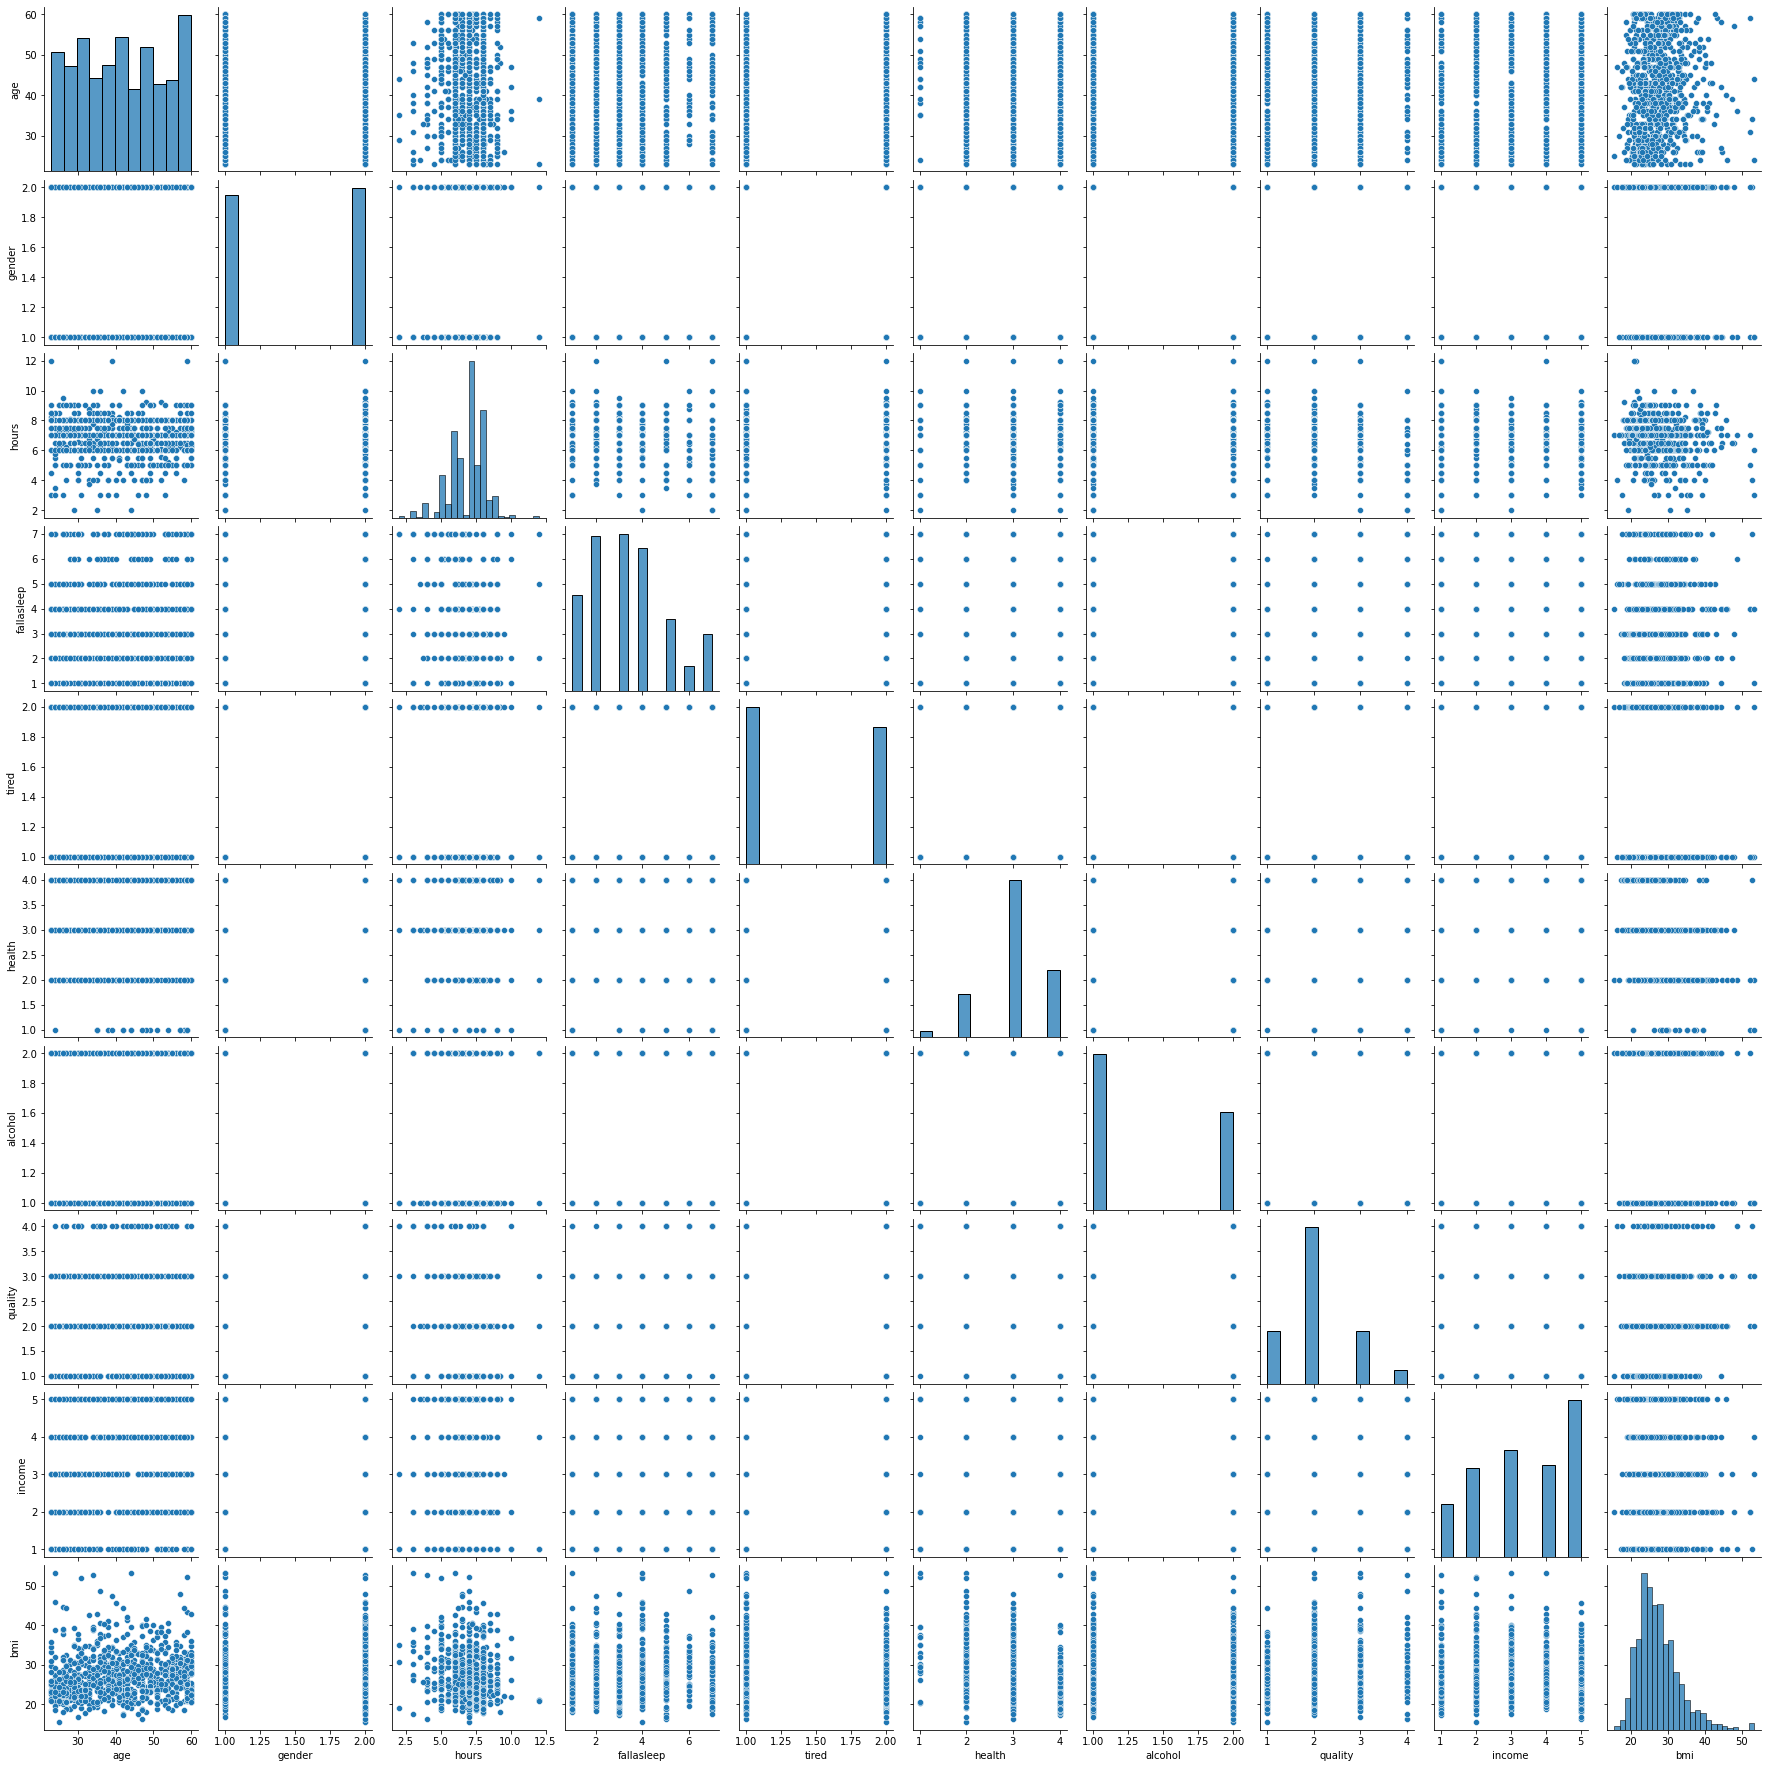

In [19]:
import seaborn as sns
sns.pairplot(cleandata)

6. Using the k-means clustering model to analyze them. <Br>
6(a) - Determin optimal k-value using WCSS for each feacture.

6(a-i) Create a list of features and remove 'quality' as 'quality' will be y-value

In [28]:
features = list(cleandata.columns)
features.remove("quality")
print(features)

y = 'quality'

['age', 'gender', 'hours', 'fallasleep', 'tired', 'health', 'alcohol', 'income', 'bmi']


6(a-ii) Use loop to show the Elbow Curve plot for each features

<ipython-input-40-47d9f9d3d207>:7: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans.fit(X)
<ipython-input-40-47d9f9d3d207>:7: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans.fit(X)
<ipython-input-40-47d9f9d3d207>:7: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans.fit(X)
<ipython-input-40-47d9f9d3d207>:7: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans.fit(X)
<ipython-input-40-47d9f9d3d207>:7: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans.fit(X)
<ipython-input-40-47d9f9d3d207>:7: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clust

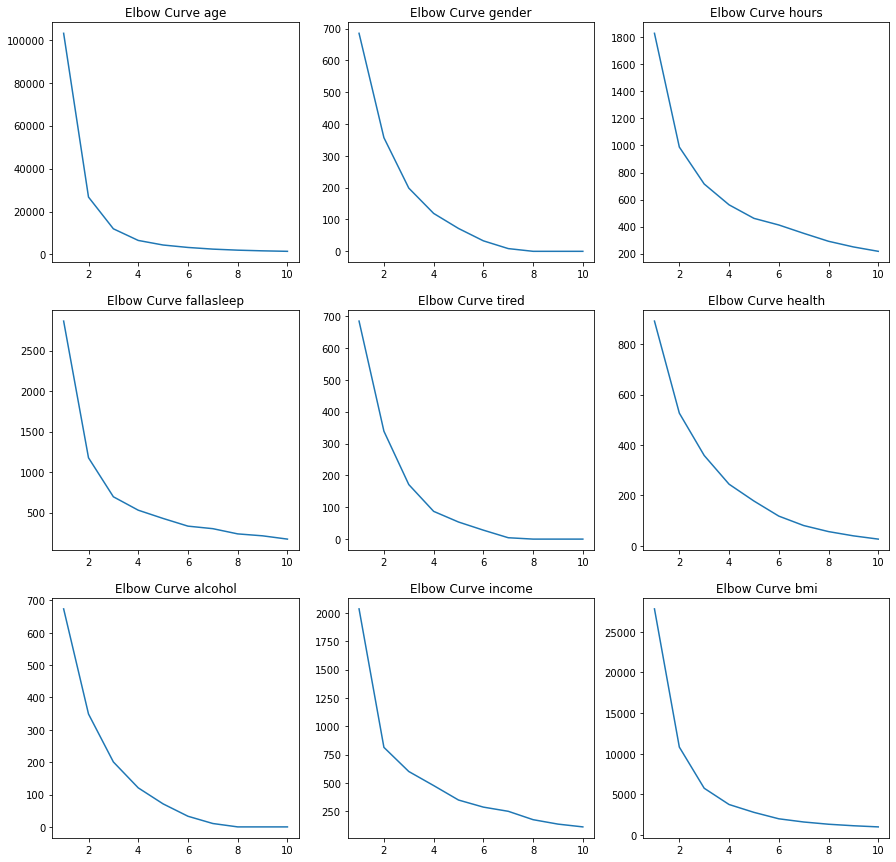

In [40]:
fig, axs = plt.subplots(3,3, figsize=(15,15))
for j in range(len(features)):
    X = cleandata[[features[j],y]]
    wcss=[]
    for i in range(1,11):
        kmeans=KMeans(n_clusters=i,init='k-means++')   # k-means++ is a good general purpose seed value for randomly selecting the initial centroids
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    axs[j//3, j%3].plot(np.arange(1,11),wcss)
    axs[j//3, j%3].set_title(f'Elbow Curve {features[j]}')


6(a-iii) create the list of optimal k value corresponding to the feature list.

In [64]:
k = [3, 4, 4, 3, 4, 3, 3, 4, 3]

6(b) using the the optimal k-value to find the clusters out.

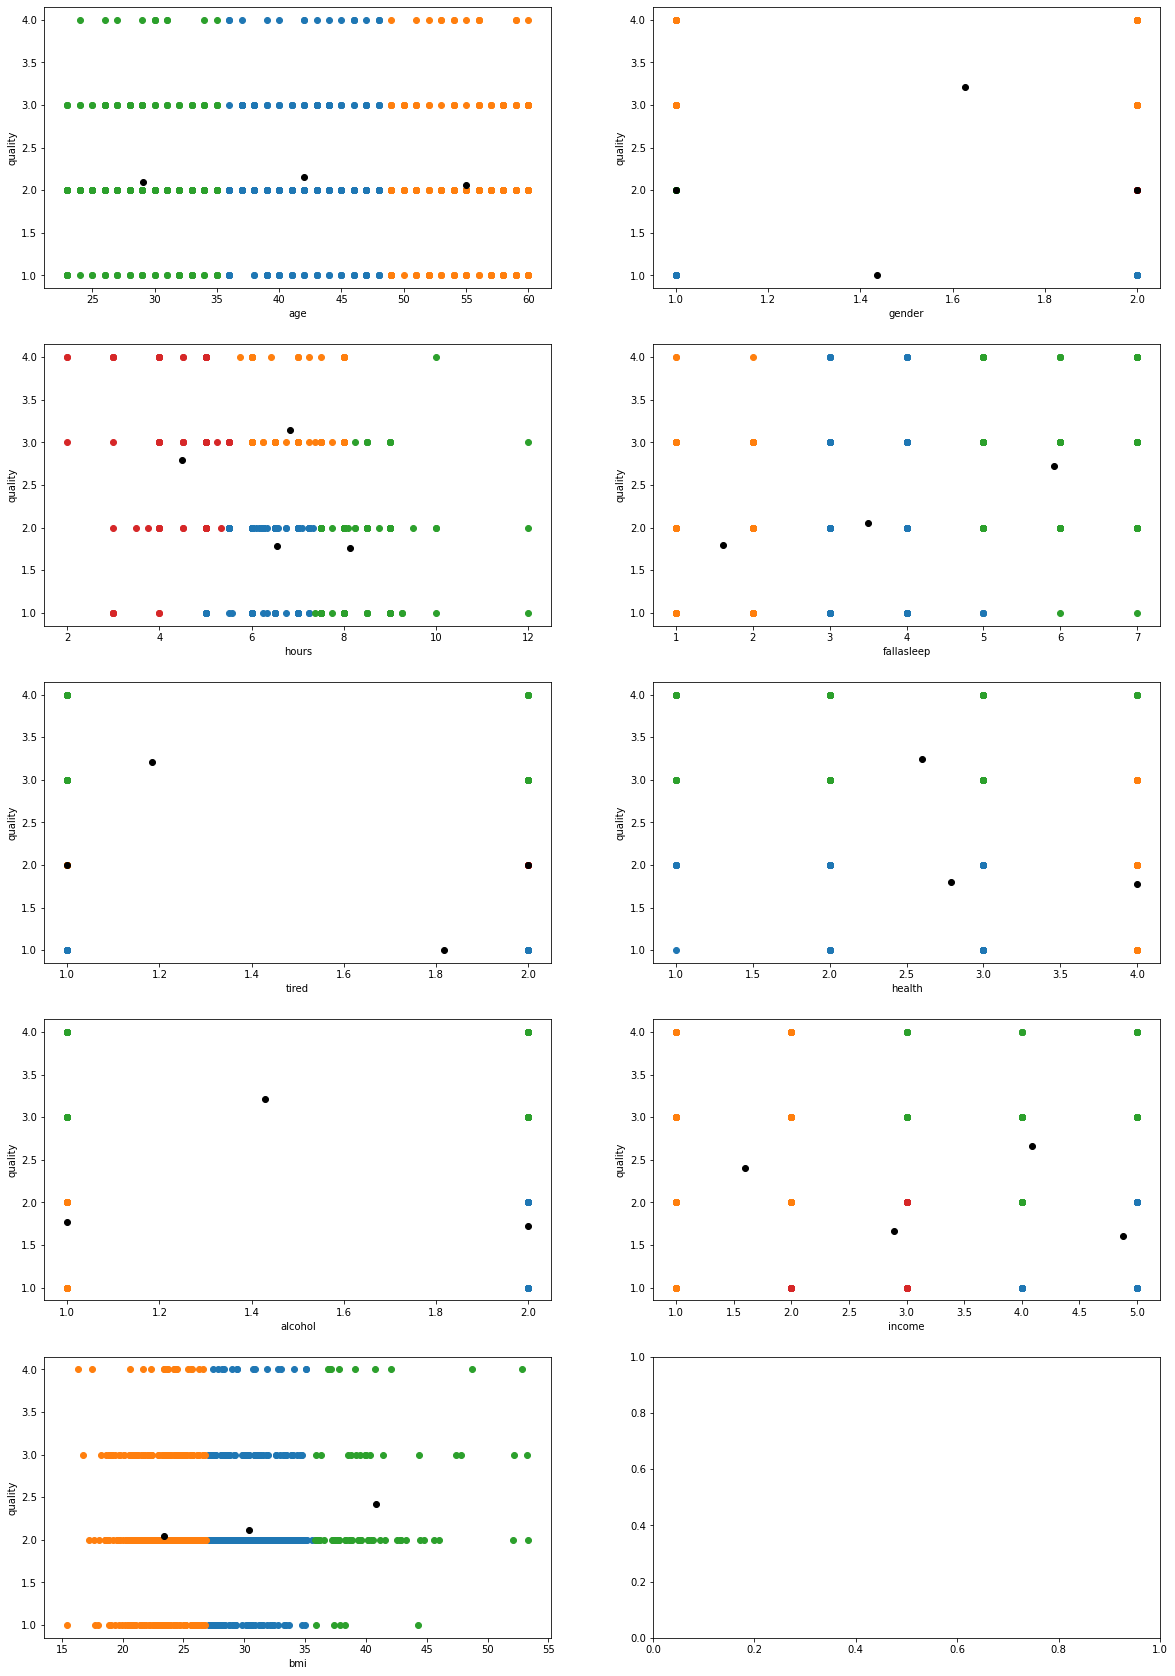

In [66]:
fig, axs = plt.subplots(5,2, figsize=(20,30))
for j in range(len(features)):
    kmeans = KMeans(n_clusters=k[j],init='k-means++')
    X = cleandata[[features[j],y]]
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    for i in range(k[j]):
        axs[j//2, j%2].scatter(X[y_kmeans == i][features[j]], X[y_kmeans == i].quality, label = f'cluster {i+1}') 
    axs[j//2, j%2].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = 'black', label = 'Centroids')
    axs[j//2, j%2].set(xlabel=features[j], ylabel=y)


# Conclusion

### 1. age

There seems no correlarion between the age and quality of sleep. The centroid of each cluster stays around 2 (Fairly good)

### 2. gender

There seems no correlarion between the gender as the centroid is fairly same (2)

### 3. hours

There seems a strong correlation between hours and sleep quality. The cluster that claims has the excellet quality of sleep (sleep quality 1)
the hours is between 6.5-9 hours. The cluster that has less than 0-5 hours of sleep, the centroid shows the quality is near 3 (fairly bad).
around 6 hours, the centroid is somewhere bewteen 2-3 (fairly good and fairly bad), and the cluster has more than 9 hours is a little above 2(fairly good). 

### 4. fallAsleep - how long does it take to fall asleep? 1: within 5 mins ....7: more than 1 hour

The centroid of each clusters shows that there seems to be a correlation between the time you take to fall asleep and the quality of sleep.
Left most centroid indicates the sleep quality of that cluster is somewhere between 1.5-2 (which means its above fairly good and they fall asleep within 10-20 mins). The middle centroid is around 2 (which means fairly good, and they fall asleep within 20-30 mins). Sleep quality of the right centroid is around 3 (fairly bad and they take more than 45 mins to fall asleep). We can say that peopple who fall a sleep faster, tend to have better quality sleep.

### 5. tired - Do you feel tired during the day?

There seems a correlation between if people who feel tired during the day and their sleep quality.
As two centroid are left above (feel tired & worse sleep quality) and two centroid stays right below (do not feel tired & good sleep quality)

### 6. health 

Except the people who have excellent health (their centroid of sleep quality 2, and range is 1-3), it is hard to see the correltion between health and sleep quality. We need more investigation on this.

### 7. alcohol

There seems not obvious correlation between alcohol and sleep quality. However, the centroid in the middle is a little bit leaning toward to Yes, and their sleep quality is 3-4. We need more investigation on alcohol (such as alcohol consumption) to prove if there is any correlation.

### 8. income

It seems lower income and upper middle income centroid has worse sleep quality.
Middle income, and higher income stays lower than them. We might need more investigation on this.

### 9. bmi

There seems a pretty strong correlation between BMI and sleep quality. If you see the each entroid, it actualy make a liner line. 
the lower the BMI is, the better the sleep quality.

### Overall

From the analysis, it is shown from the data that people who has better sleep quality sleep anywhere between 6-9 hours daily, takes less than 20 minutes to fall asleep, and they tend not to feel tired during the day, and their BMI lower.
